# Cancer Prediction

## Import Data

In [16]:
import pandas as pd

In [17]:
DATASET_PATH = "./cancerdata.csv"

In [18]:
df = pd.read_csv(DATASET_PATH)
df.head()

,id,diagnosis,Sex,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,F,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,M,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,M,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,F,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,F,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


### Remove ID column

In [19]:
df.drop(columns=['id'], inplace=True)

## Data Exploration

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   Sex                569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     567 non-null    float64
 9   points_mean        568 non-null    float64
 10  symmetry_mean      568 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

### Missing Values

In [21]:
def missing_value_report(dataframe: pd.DataFrame) -> dict[str, float]:
    """ Returns the percentage of missing values per column """
    missing_values_percentage = 100 * dataframe.isna().sum(axis='index') / dataframe.count()
    return missing_values_percentage[missing_values_percentage > 0].to_dict()


display(missing_value_report(df))

{'concavity_mean': 0.3527336860670194,
 'points_mean': 0.176056338028169,
 'symmetry_mean': 0.176056338028169}

In [22]:
# Fill the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_fill_value = df[numerical_cols].median()
df[numerical_cols] = df[numerical_cols].fillna(numerical_fill_value)

# Fill the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_fill_value = df[categorical_cols].mode()
df[categorical_cols] = df[categorical_cols].fillna(categorical_fill_value)

In [23]:
missing_value_report(df)

{}

__All the missing values have been imputed and now our dataframe has zero missing values__

### Visual Exploration

In [24]:
import plotly.express as px

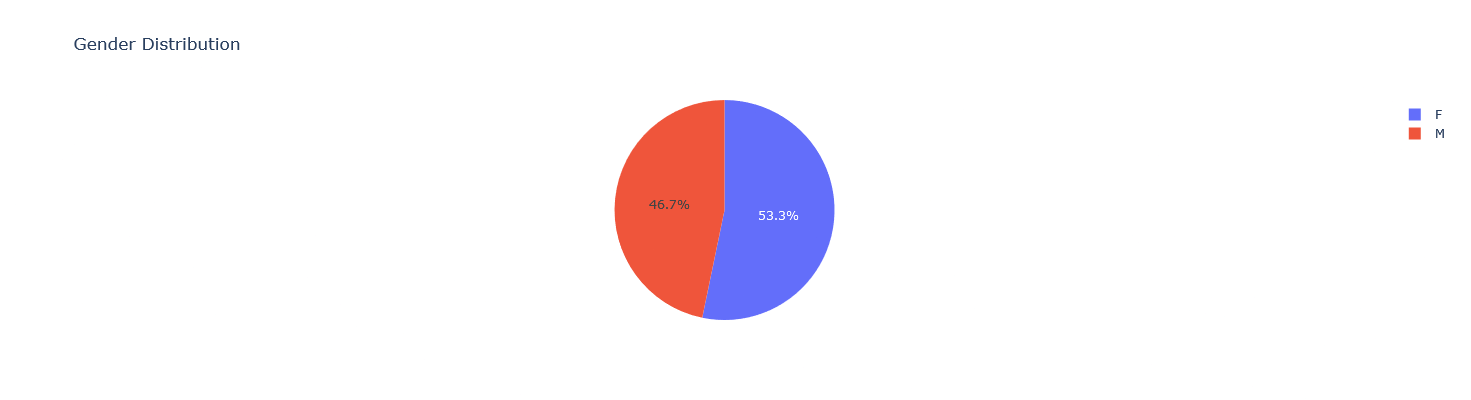

In [25]:
fig = px.pie(df, names='Sex', title='Gender Distribution', height=400, width=400)
fig.show()

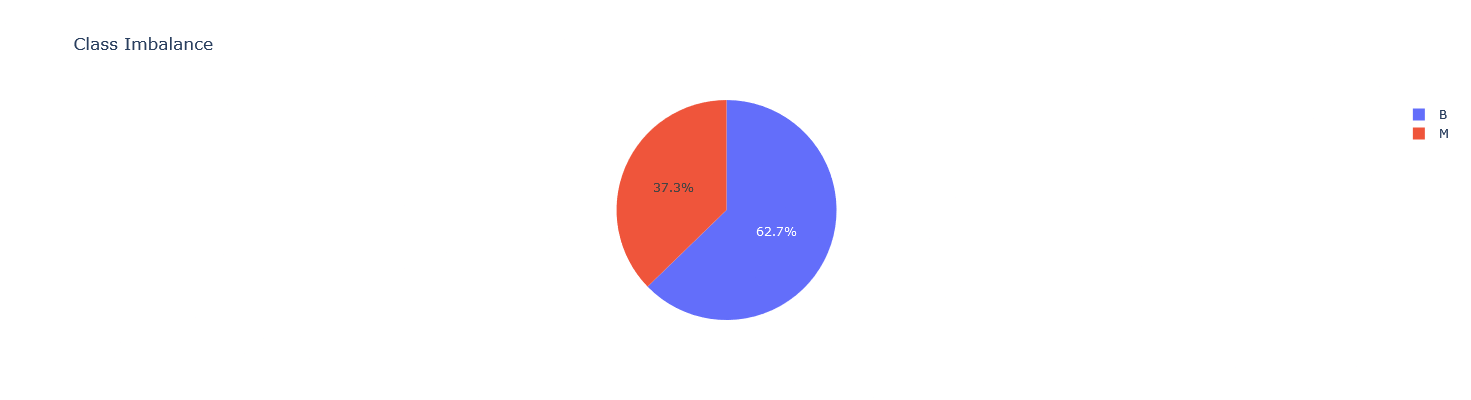

In [26]:
fig = px.pie(df, names='diagnosis', title='Class Imbalance', height=400, width=400)
fig.show()

## Data Scaling & Encoding

In [32]:
import numpy as np

# Standardize the numerical columns so that every numerical column
# has Mean = 0 and Standard Deviation = 1

df[numerical_cols] = (df[numerical_cols] - df[numerical_cols]) / df[numerical_cols].std()

# Encodes the categorical variables
for col in categorical_cols:
    unique_cats = df[col].unique()
    mapping = {category: i for i, category in enumerate(unique_cats)}
    df[col] = df[col].map(mapping)


# Reduce the datatypes
for column, dtype in zip(df.columns, df.dtypes.values):
    if dtype == 'float64':
        df[column] = df[column].astype(np.float16)
    if dtype == 'object':
        df[column] = df[column].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   Sex                569 non-null    int64  
 2   radius_mean        0 non-null      float16
 3   texture_mean       0 non-null      float16
 4   perimeter_mean     0 non-null      float16
 5   area_mean          0 non-null      float16
 6   smoothness_mean    0 non-null      float16
 7   compactness_mean   0 non-null      float16
 8   concavity_mean     0 non-null      float16
 9   points_mean        0 non-null      float16
 10  symmetry_mean      0 non-null      float16
 11  dimension_mean     0 non-null      float16
 12  radius_se          0 non-null      float16
 13  texture_se         0 non-null      float16
 14  perimeter_se       0 non-null      float16
 15  area_se            0 non-null      float16
 16  smoothness_se      0 non-n